# NFL Injuries 

The following data explores information from NFL injuries and the factors which may predict injury, and the amount of time missed due to injury. 

##### Prep the data for exporation

In [2]:
#import 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')

colors = sns.color_palette('colorblind')

This dataframe was created from several datasets taken from this Kaggle site:

https://www.kaggle.com/c/nfl-playing-surface-analytics/data

In [3]:
df = pd.read_csv('./data/df.csv')

In [4]:
df.isna().sum()

PlayerKey         0
GameID            0
PlayKey           0
RosterPosition    0
PlayerDay         0
PlayerGame        0
StadiumType       4
FieldType         0
Temperature       0
Weather           3
PlayType          0
PlayerGamePlay    0
Position          0
PositionGroup     0
BodyPart          0
Surface           0
DM_M1             0
DM_M7             0
DM_M28            0
DM_M42            0
dtype: int64

In [5]:
len(df)

77

It should be noted here that this is a somewhat small data set. Although the player dataset is much larger, it isn't of much interest to us to answer the question we asked. We may use it to answer some questions but our combined df w/ injury data will be used for most analysis. 

### Exploring the dataset ###

The first thing I'd like is to understand what's in our dataset. Let's explore.

In [6]:
df.columns

Index(['PlayerKey', 'GameID', 'PlayKey', 'RosterPosition', 'PlayerDay',
       'PlayerGame', 'StadiumType', 'FieldType', 'Temperature', 'Weather',
       'PlayType', 'PlayerGamePlay', 'Position', 'PositionGroup', 'BodyPart',
       'Surface', 'DM_M1', 'DM_M7', 'DM_M28', 'DM_M42'],
      dtype='object')

We know that there are some missing data in the Stadium Type and Weather sections. Let's fix that.

In [7]:
#first let's fix the values so they make more sense. It's odd that no "NaN" values show. 
df.StadiumType.value_counts()

Outdoor                38
Outdoors                8
Indoor                  7
Retractable Roof        3
Dome                    3
Indoors                 3
Outddors                2
Indoor, Open Roof       1
Retr. Roof-Closed       1
Open                    1
Domed, closed           1
Closed Dome             1
Retr. Roof - Open       1
Oudoor                  1
Indoor, Roof Closed     1
Retr. Roof - Closed     1
Name: StadiumType, dtype: int64

In [8]:
df.StadiumType=df.StadiumType.replace('Outdoors','Outdoor').replace('Indoors','Indoor').replace('Outddors','Outdoor').replace(
'Retr. Roof - Closed', 'Indoor').replace('Retr. Roof - Open', 'Partial Outdoor').replace('Oudoor','Outdoor').replace(
'Closed Dome','Dome').replace('Open','Partial Outdoor').replace('Indoor, Roof Closed','Indoor').replace(
'Indoor, Open Roof','Partial Outdoor').replace('Domed, closed','Indoor').replace('Indoor, Roof Closed','Indoor').replace(
    'Retr. Roof-Closed','Indoor').fillna('Unknown')

In [9]:
df.StadiumType.value_counts()

Outdoor             49
Indoor              14
Dome                 4
Unknown              4
Partial Outdoor      3
Retractable Roof     3
Name: StadiumType, dtype: int64

In [10]:
df.Weather.value_counts()

Cloudy                                                                              13
Partly Cloudy                                                                       11
Sunny                                                                               11
Clear                                                                                7
Indoor                                                                               5
Rain                                                                                 4
Indoors                                                                              3
Cold                                                                                 3
Cloudy, 50% change of rain                                                           2
Clear skies                                                                          2
Clear and warm                                                                       1
Mostly cloudy                              

Another case of poor data naming, let's fix this. 

In [11]:
df.Weather=df.Weather.replace('Partly Cloudy','Cloudy').replace('Clear','Sunny').replace('Indoors','Indoor').replace(
'Clear skies','Sunny').replace('Cloudy, 50% change of rain','Cloudy').replace('Rain shower','Rain').replace(
'Clear Skies','Sunny').replace('Mostly Sunny','Sunny').replace('Coudy','Cloudy').replace('Fair','Cloudy').replace(
'Clear and warm','Sunny').replace('Sun & clouds','Sunny').replace('Cloudy and Cool','Cloudy').replace(
'Mostly cloudy','Cloudy').replace('Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.','Cloudy').replace(
'Light Rain','Rain').replace('Controlled Climate','Indoor').replace('Mostly sunny','Sunny').fillna('Unknown')

In [12]:
df.Weather.value_counts()

Cloudy     31
Sunny      25
Indoor      9
Rain        6
Cold        3
Unknown     3
Name: Weather, dtype: int64

In [13]:
df.columns

Index(['PlayerKey', 'GameID', 'PlayKey', 'RosterPosition', 'PlayerDay',
       'PlayerGame', 'StadiumType', 'FieldType', 'Temperature', 'Weather',
       'PlayType', 'PlayerGamePlay', 'Position', 'PositionGroup', 'BodyPart',
       'Surface', 'DM_M1', 'DM_M7', 'DM_M28', 'DM_M42'],
      dtype='object')

There are 3 different columns which recognize a players position - RosterPosition, Position, and Position Group. It's unecessary to have all of these and i'd like to choose the most specific one & the most general to compare. Let's go with Position and Position Group.  

In [14]:
df = df.drop(columns=['RosterPosition'])

Finally, I believe that the most important feature of the data is the days missed after injury. The ability to predict this information would be essential not just to coaches and players, but the wide world of fantasy football. I don't know HOW many times I've been at the mercy and agony of an injured starter. 

In [15]:
#The dataframe currently has the days missed as dummy data
#Let's combine the columns with the following legend
# 1 = up to one week missed 
# 2 = up to 3 weeks missed 
# 3 = up to 2 months missed 
# 4 = 2 months or more missed 

df['days_missed'] = (df['DM_M1'] + df['DM_M7'] + df['DM_M28'] + df['DM_M42'])
df.head()

,PlayerKey,GameID,PlayKey,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,days_missed
0,31070,31070-3,31070-3-7,15,3,Outdoor,Natural,89,Sunny,Rush,7,RB,RB,Knee,Natural,1,1,1,1,4
1,33337,33337-8,33337-8-15,365,8,Outdoor,Natural,81,Cloudy,Pass,15,TE,TE,Foot,Natural,1,1,1,0,3
2,33474,33474-19,33474-19-7,393,19,Outdoor,Natural,79,Cloudy,Rush,7,FS,DB,Knee,Natural,1,1,1,0,3
3,34347,34347-5,34347-5-9,39,5,Outdoor,Natural,48,Cloudy,Kickoff,9,WR,WR,Knee,Natural,1,1,0,0,2
4,35570,35570-15,35570-15-35,389,15,Outdoor,Natural,79,Sunny,Pass,35,T,OL,Knee,Natural,1,1,0,0,2


In [24]:
#now dropping the dummy values 
df=df.drop(['DM_M1','DM_M7','DM_M28','DM_M42'], axis=1)

In [16]:
df.head()

,PlayerKey,GameID,PlayKey,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,days_missed
0,31070,31070-3,31070-3-7,15,3,Outdoor,Natural,89,Sunny,Rush,7,RB,RB,Knee,Natural,1,1,1,1,4
1,33337,33337-8,33337-8-15,365,8,Outdoor,Natural,81,Cloudy,Pass,15,TE,TE,Foot,Natural,1,1,1,0,3
2,33474,33474-19,33474-19-7,393,19,Outdoor,Natural,79,Cloudy,Rush,7,FS,DB,Knee,Natural,1,1,1,0,3
3,34347,34347-5,34347-5-9,39,5,Outdoor,Natural,48,Cloudy,Kickoff,9,WR,WR,Knee,Natural,1,1,0,0,2
4,35570,35570-15,35570-15-35,389,15,Outdoor,Natural,79,Sunny,Pass,35,T,OL,Knee,Natural,1,1,0,0,2


In [17]:
#let's also get rid of other columns that won't be relevant to our data at this point. 
# The PlayerKey, GameID, PlayKey, PlayerDay, and PlayerGame will throw off our analysis 
df = df.drop(['PlayerKey','GameID','PlayKey','PlayerDay','PlayerGame', 'PlayerGamePlay'], axis=1)

In [18]:
df.head()

,StadiumType,FieldType,Temperature,Weather,PlayType,Position,PositionGroup,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,days_missed
0,Outdoor,Natural,89,Sunny,Rush,RB,RB,Knee,Natural,1,1,1,1,4
1,Outdoor,Natural,81,Cloudy,Pass,TE,TE,Foot,Natural,1,1,1,0,3
2,Outdoor,Natural,79,Cloudy,Rush,FS,DB,Knee,Natural,1,1,1,0,3
3,Outdoor,Natural,48,Cloudy,Kickoff,WR,WR,Knee,Natural,1,1,0,0,2
4,Outdoor,Natural,79,Sunny,Pass,T,OL,Knee,Natural,1,1,0,0,2


###### What kind of players are in our dataset? 

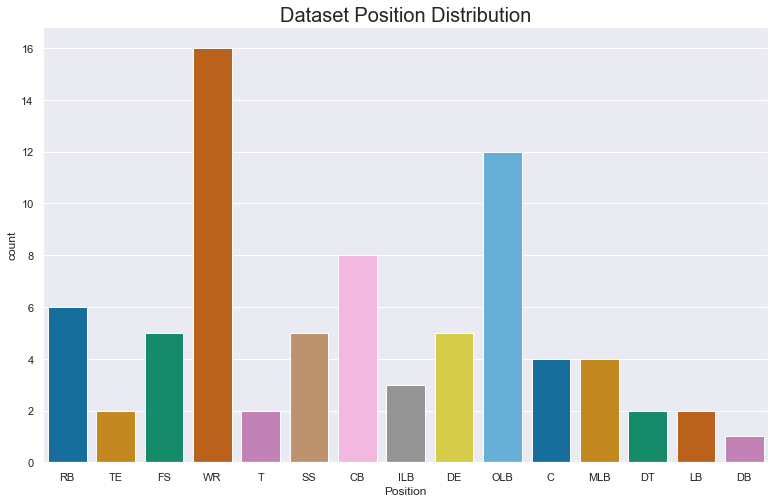

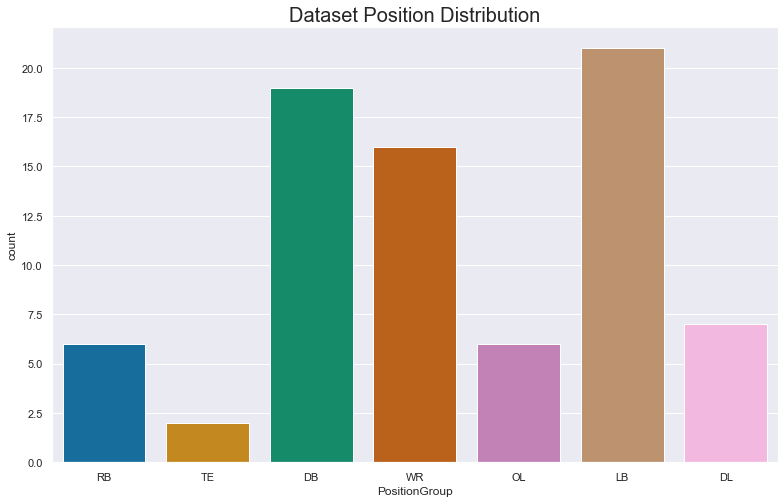

In [19]:
sns.set_context('notebook')

plt.figure(figsize=(13,8))
sns.countplot(df['Position'], palette=colors)
plt.title('Dataset Position Distribution', fontsize = 20)
plt.show()

plt.figure(figsize=(13,8))
sns.countplot(df['PositionGroup'], palette=colors)
plt.title('Dataset Position Distribution', fontsize = 20)
plt.show()

Interesting - there are no quarterbacks on the list! 

###### What's the split between turf and grass?

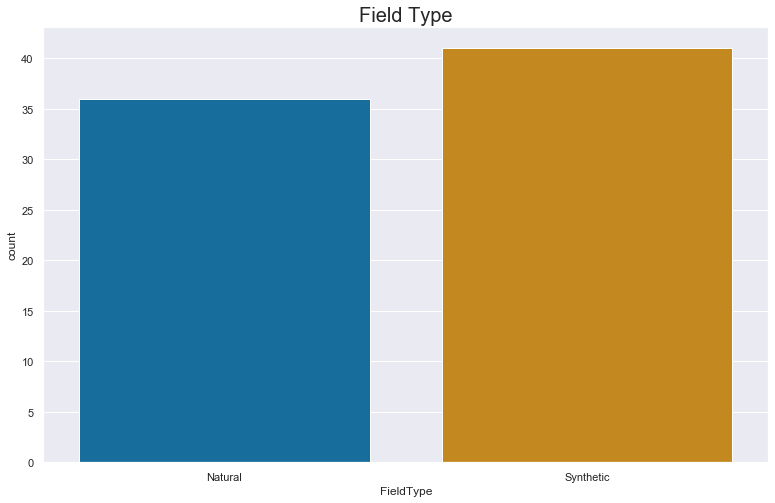

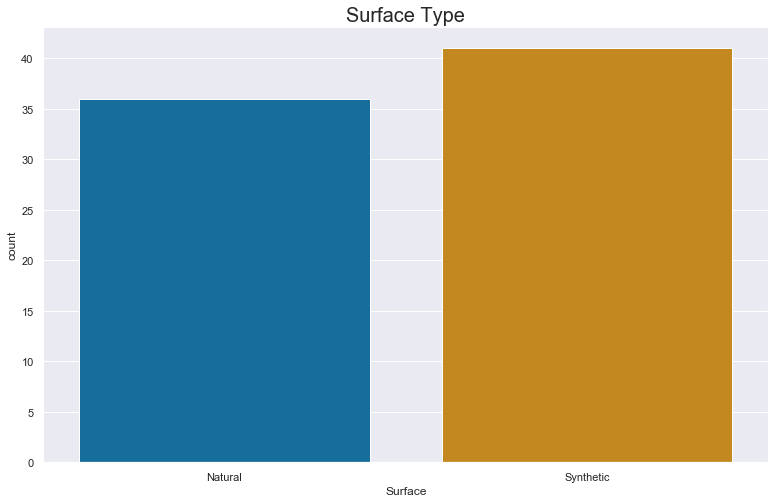

In [20]:
fig = plt.figure(figsize=(13,8))
sns.set_context('notebook')
colors = sns.color_palette('colorblind')

sns.countplot(df['FieldType'], palette=colors)
plt.title('Field Type', fontsize = 20)
plt.show()

fig = plt.figure(figsize=(13,8))
sns.set_context('notebook')
colors = sns.color_palette('colorblind')

sns.countplot(df['Surface'], palette=colors)
plt.title('Surface Type', fontsize = 20)
plt.show()

In [21]:
#looks like these two columns hold the exact same information, let's delete one
df = df.drop('Surface', axis=1)

Looks like turf is slightly more common than grass but overall, about even use. 

###### What kind of injuries happen where? 

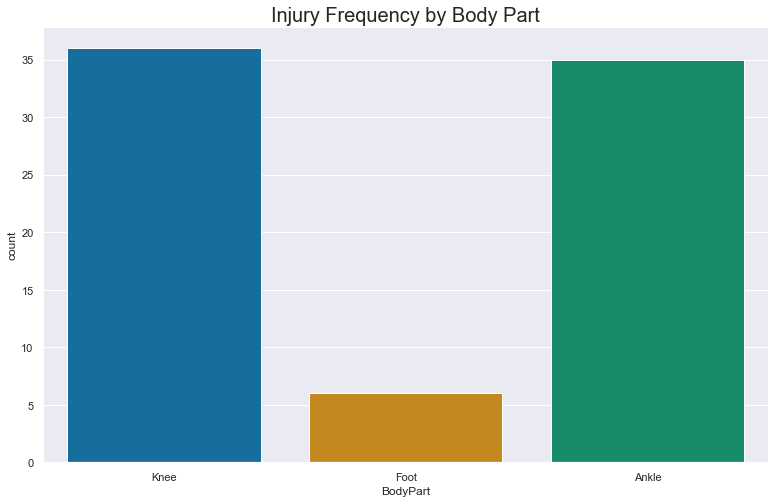

In [22]:
#Breakdown of body part
fig = plt.figure(figsize=(13,8))
sns.set_context('notebook')

sns.countplot(df['BodyPart'], palette=colors)
plt.title('Injury Frequency by Body Part', fontsize = 20)
plt.show()

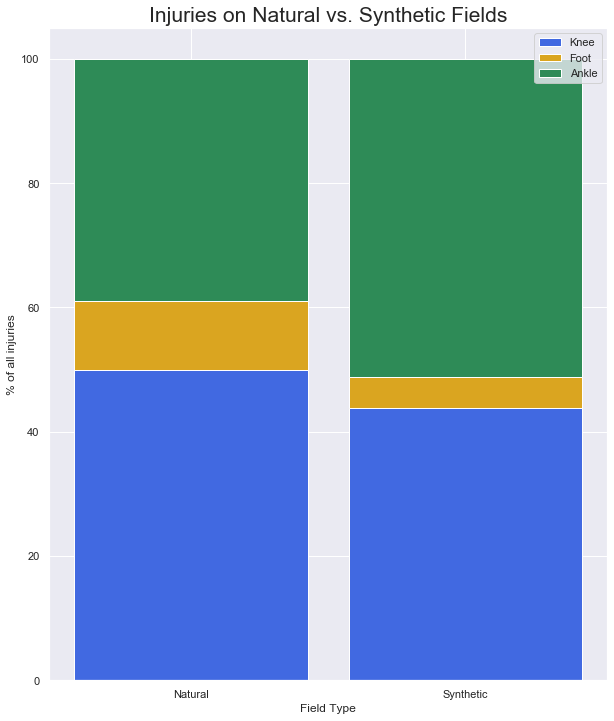

In [23]:
#Stacked bar chart of injury by surface type 
fig = plt.figure(figsize=(10,12))
sns.set_context('notebook')

r = [0,1]

#I really wanted to make this a loop but couldn't quite get there. 
body_p = {}
body_p.update({'blue' : [len(df.loc[(df.BodyPart == 'Knee') & (df.FieldType == 'Natural')]), 
                        len(df.loc[(df.BodyPart == 'Knee') & (df.FieldType == 'Synthetic')])]})
body_p.update({'gold' : [len(df.loc[(df.BodyPart == 'Foot') & (df.FieldType == 'Natural')]), 
                        len(df.loc[(df.BodyPart == 'Foot') & (df.FieldType == 'Synthetic')])]})
body_p.update({'green' : [len(df.loc[(df.BodyPart == 'Ankle') & (df.FieldType == 'Natural')]), 
                        len(df.loc[(df.BodyPart == 'Ankle') & (df.FieldType == 'Synthetic')])]})

bp_df = pd.DataFrame(body_p)

totals = [i+j+k for i,j,k in zip(bp_df['blue'], bp_df['gold'], bp_df['green'])]
blue_bar = [i / j * 100 for i,j in zip(bp_df['blue'], totals)]
gold_bar = [i / j * 100 for i,j in zip(bp_df['gold'], totals)]
green_bar = [i / j * 100 for i,j in zip(bp_df['green'], totals)]

barWidth = 0.85
names = df.FieldType.unique()

plt.bar(r, blue_bar, color='royalblue', edgecolor='white', width=barWidth, label='Knee')
plt.bar(r, gold_bar, bottom=blue_bar, color='goldenrod', edgecolor='white', width=barWidth, label='Foot')
plt.bar(r, green_bar, bottom=[i+j for i,j in zip(blue_bar, gold_bar)], color='seagreen', edgecolor='white', width=barWidth, label='Ankle')
 
# Custom x axis
plt.xticks(r, names)
plt.legend()
plt.xlabel("Field Type")
plt.ylabel("% of all injuries")
plt.title("Injuries on Natural vs. Synthetic Fields", fontsize=21)

 
# Show graphic
plt.show()

Now it's getting interesting! Knee injuries appear to occue at the exact same rate but there are more ankle injuries with turk and more foot injuries with natural field. This is immediately surprising to me because I would imagine "turf toe" would account for many of the foot injuries.

**Note:** code for the above graph heavily influenced by https://python-graph-gallery.com/13-percent-stacked-barplot/

###### What about bodypart by position?

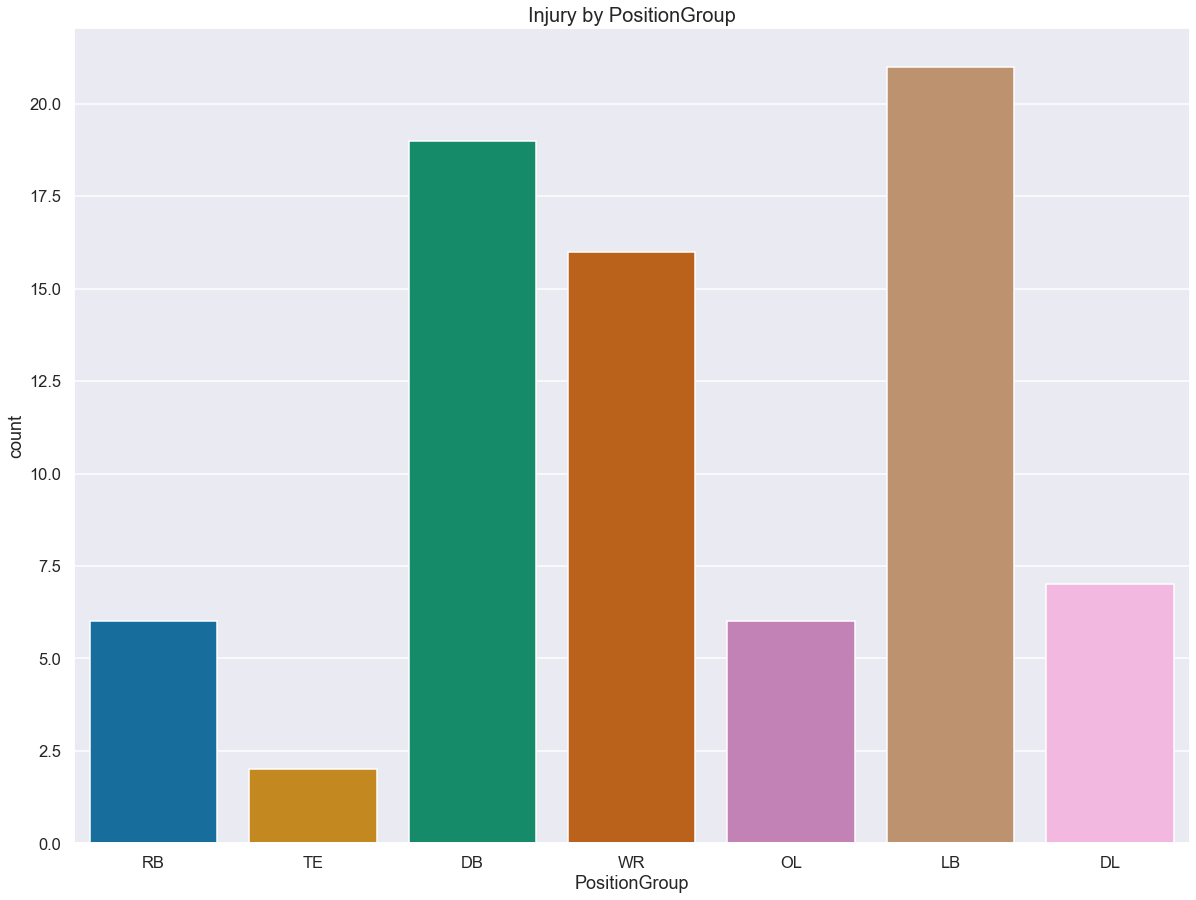

In [24]:
#Frist, which players have the most injuries in our dataset?
fig = plt.figure(figsize=(20,15))
sns.set_context('talk')

sns.countplot(df['PositionGroup'], palette = colors)
plt.title('Injury by PositionGroup', fontsize = 20)
plt.show()

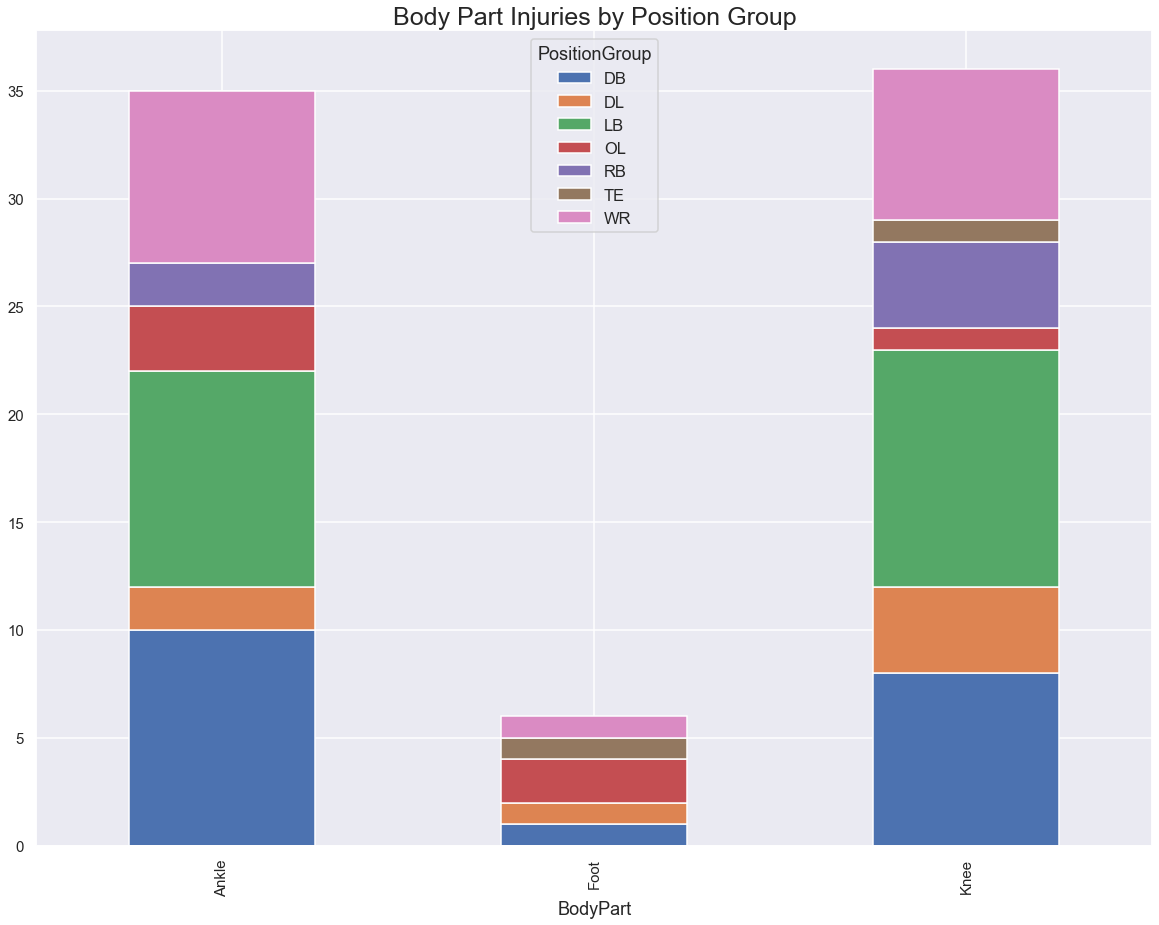

In [25]:
df_plot = df.groupby(['PositionGroup', 'BodyPart']).size().reset_index().pivot(
    columns='PositionGroup', index='BodyPart', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(20,15), fontsize=15)
plt.title('Body Part Injuries by Position Group', fontsize=25)
plt.show()

This is a little confusing to look at. Let's try to make this into a stacked bar chart. 

In [33]:
#Create a for loop that will create an array of the number of body part injuries in order of position groups

Knee = []
Foot = []
Ankle = []

for pos in df.PositionGroup.unique():
    for part in df.BodyPart.unique():
        if part == 'Knee':
            Knee.append(len(df.loc[(df.BodyPart == part)&(df.PositionGroup==pos)]))
        elif part == 'Foot':
            Foot.append(len(df.loc[(df.BodyPart == part)&(df.PositionGroup==pos)]))
        else:
            Ankle.append(len(df.loc[(df.BodyPart == part)&(df.PositionGroup==pos)]))


        

In [37]:
#check what order the Position Groups are in.
for pos in df.PositionGroup.unique():
    print(pos)

RB
TE
DB
WR
OL
LB
DL


In [46]:
Foot

[0, 1, 1, 1, 2, 0, 1]

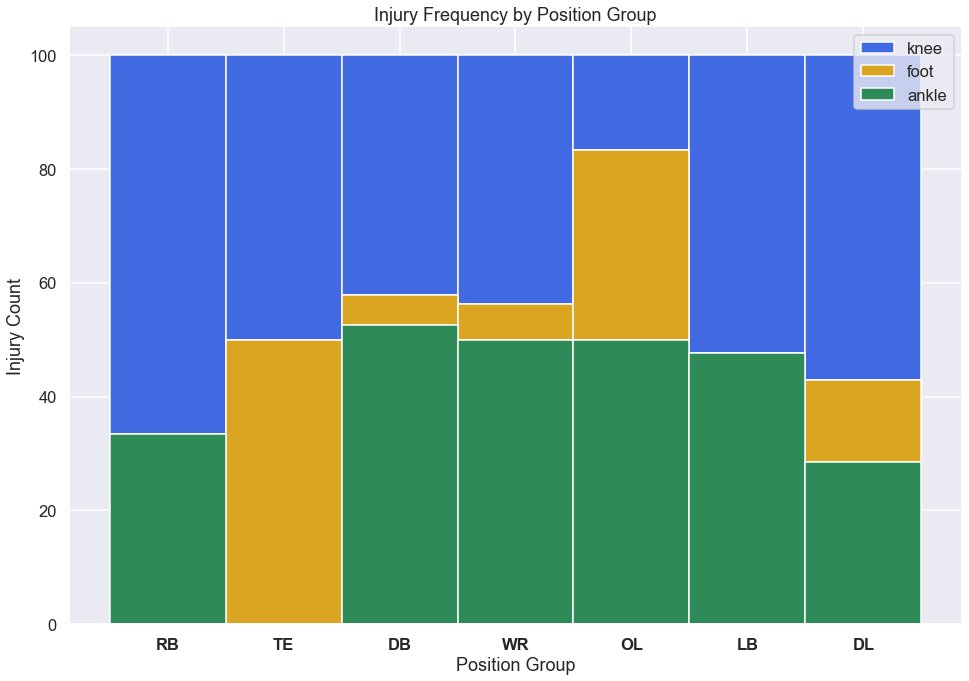

In [52]:
# stacked bar plot
# use our for loop
Knee = []
Foot = []
Ankle = []

for pos in df.PositionGroup.unique():
    for part in df.BodyPart.unique():
        if part == 'Knee':
            Knee.append(len(df.loc[(df.BodyPart == part)&(df.PositionGroup==pos)]))
        elif part == 'Foot':
            Foot.append(len(df.loc[(df.BodyPart == part)&(df.PositionGroup==pos)]))
        else:
            Ankle.append(len(df.loc[(df.BodyPart == part)&(df.PositionGroup==pos)]))


Position_Groups = []
for pos in df.PositionGroup.unique():
    Position_Groups.append(pos)

#Get values from the group and categories
PositionGroups = np.array(Position_Groups)
Knee = np.array(Knee)
Foot = np.array(Foot)
Ankle = np.array(Ankle)
total = Knee+ Foot+ Ankle
proportion_knee = np.true_divide(Knee, total) * 100
proportion_foot = np.true_divide(Foot, total) * 100
proportion_ankle = np.true_divide(Ankle, total) * 100
    
# The position of the bars on the x-axis
r = range(len(Position_Groups))
barWidth = 1
#plot bars
plt.figure(figsize=(16,11))
ax1 = plt.bar(r, proportion_knee, bottom=proportion_foot+proportion_ankle, color='royalblue', edgecolor='white', width=barWidth, label="knee")
ax2 = plt.bar(r, proportion_foot, bottom=proportion_ankle, color='goldenrod', edgecolor='white', width=barWidth, label='foot')
ax3 = plt.bar(r, proportion_ankle, color='seagreen', edgecolor='white', width=barWidth, label='ankle')
plt.legend()
plt.xticks(r, Position_Groups, fontweight='bold')
plt.ylabel("Injury Count")
plt.xlabel("Position Group")
plt.title("Injury Frequency by Position Group")
plt.show()

Now THIS is getting interesting. It appears that position group really affects which kind of injury you have.

##### What about the type of play? 

Text(0.5, 1.0, 'Injuries by Body Part and Play Type')

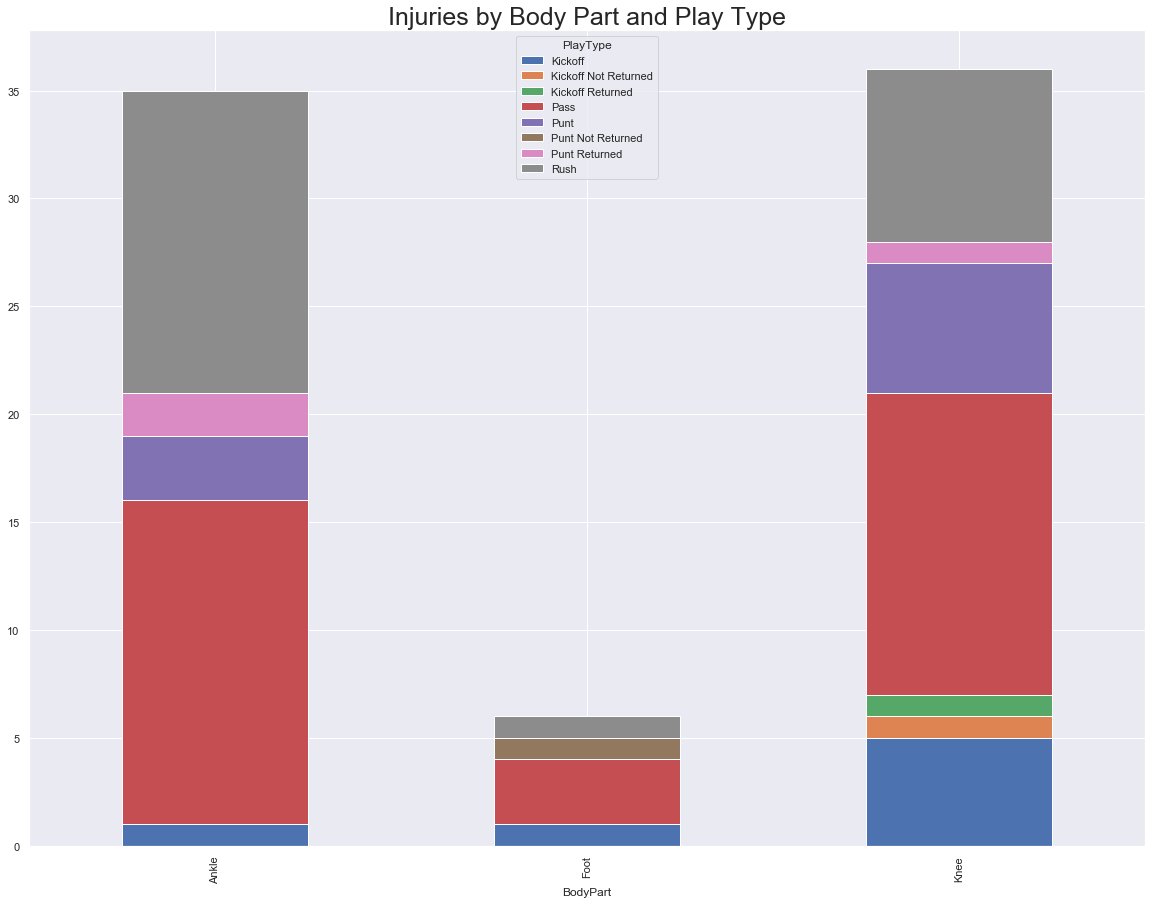

In [35]:
df_plot2 = df.groupby(['PlayType', 'BodyPart']).size().reset_index().pivot(
    columns='PlayType', index='BodyPart', values=0)
df_plot2.plot(kind='bar', stacked=True, figsize=(20,15))
plt.title('Injuries by Body Part and Play Type', fontsize=25)

It's hard to know if this is significant or not at first look because it's based on frequency - there are so many more rush/pass plays than the others listed. In fact, because of that, the graph almost suggests punts/kickoffs are potentially significant,

###### Weather

In order to understand weather I'd like to make sure that the forecast always corresponds to outdoor stadiums or else it's frankly useless.

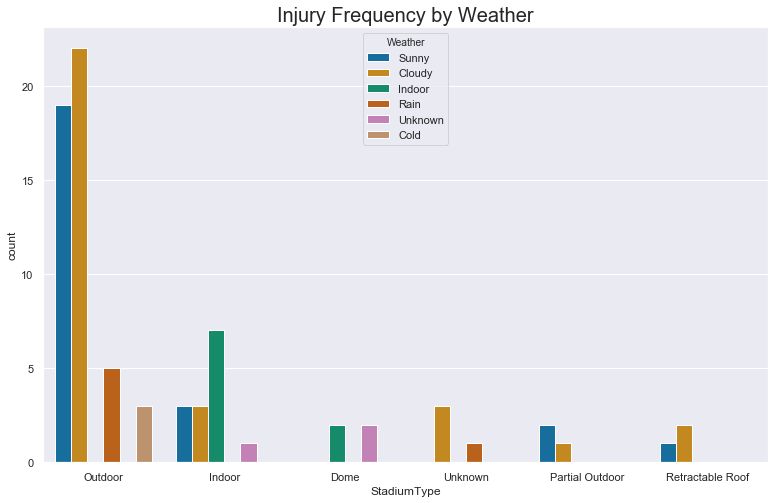

In [36]:
fig = plt.figure(figsize=(13,8))
sns.set_context('notebook')

sns.countplot(df['StadiumType'], hue=df.Weather, palette=colors)
plt.title('Injury Frequency by Weather', fontsize = 20)
plt.show()

In [37]:
#Ok so this weather information is pretty useless, let's just drop it
df = df.drop(columns='Weather')

###### What about Temperature?

I'd like to take a look at temperature too, but there are too many individual values. 

In [38]:
df.Temperature.value_counts()

-999    7
 68     7
 70     6
 89     5
 79     4
 38     3
 61     3
 75     3
 55     2
 58     2
 46     2
 45     2
 44     2
 74     2
 76     2
 78     2
 39     2
 81     2
 88     2
 42     1
 47     1
 48     1
 52     1
 53     1
 63     1
 57     1
 60     1
 62     1
 65     1
 67     1
 71     1
 72     1
 73     1
 80     1
 84     1
 33     1
Name: Temperature, dtype: int64

In [39]:
#Lets bin these bad boys!
bins = [30, 40, 50, 60, 70, 80, 90, 100,1000]
labels = ['30-39','40-49','50-59','60-69','70-79','80-89','90-99','Unknown']
df['Temperature'] = pd.cut(df['Temperature'], bins=bins, labels=labels)
df.head()

,StadiumType,FieldType,Temperature,PlayType,Position,PositionGroup,BodyPart,days_missed
0,Outdoor,Natural,80-89,Rush,RB,RB,Knee,4
1,Outdoor,Natural,80-89,Pass,TE,TE,Foot,3
2,Outdoor,Natural,70-79,Rush,FS,DB,Knee,3
3,Outdoor,Natural,40-49,Kickoff,WR,WR,Knee,2
4,Outdoor,Natural,70-79,Pass,T,OL,Knee,2


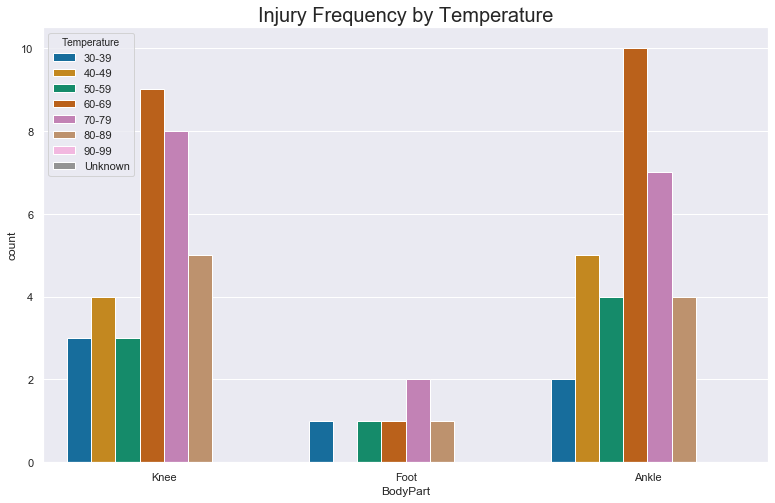

In [40]:
fig = plt.figure(figsize=(13,8))
sns.set_context('notebook')

sns.countplot(df['BodyPart'], hue=df.Temperature, palette=colors)
plt.title('Injury Frequency by Temperature', fontsize = 20)
plt.show()

A few observations about this temperature information. It appears taht consistently the 60-69/70-79* temperatures are most correlated. However, as the old adage goes, "Correlation is not causation". It's only speculative to guess what the true cause for this might be, but my first guess is that the temperatures with the most injuries are at the beginning of the season. We don't have any data on dates but I would venture to guess if we did the number of injuries would be much higher earlier in the season than later.

**Now let's move on to the most interesting data - time missed after injury. I believe this to be the most salient information for players, coaches, and fans alike. While being able to predict injury could be helpful somewhat, predicting the severity of the injury is much more useful.**

###### Let's first visualize the spread of days missed.

In [41]:
df.columns

Index(['StadiumType', 'FieldType', 'Temperature', 'PlayType', 'Position',
       'PositionGroup', 'BodyPart', 'days_missed'],
      dtype='object')

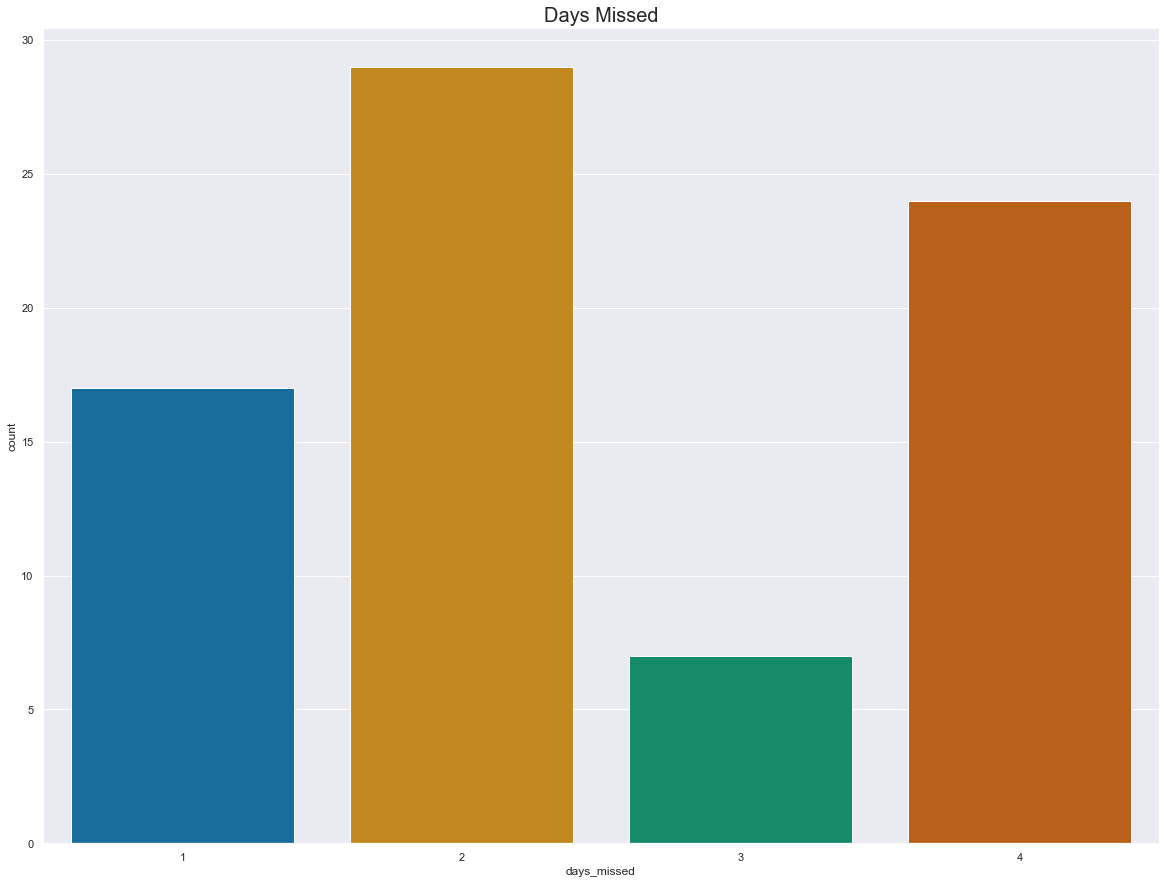

In [42]:
fig = plt.figure(figsize=(20,15))
sns.set_context('notebook')

sns.countplot(df['days_missed'], palette = colors)
plt.title('Days Missed', fontsize = 20)
plt.show()

As a reminder, this is what the numbers mean:

1 = up to one week missed   
2 = up to 3 weeks missed   
3 = up to 2 months missed   
4 = 2 months or more missed  

###### Now, let'visualize this by body part.

Text(0.5, 1.0, 'Injuries by Body Part and days_missed')

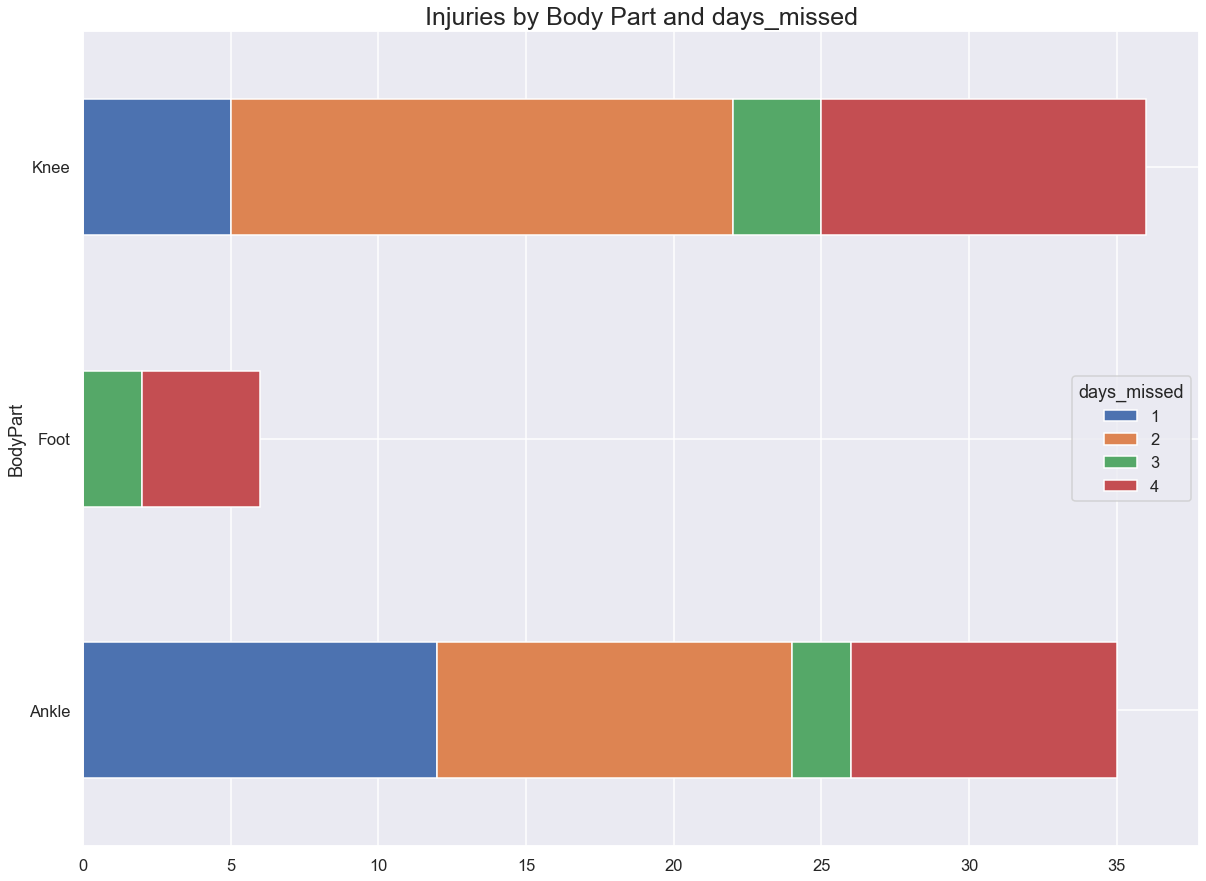

In [103]:
df_plot3 = df.groupby(['days_missed', 'BodyPart']).size().reset_index().pivot(
    columns='days_missed', index='BodyPart', values=0)
df_plot3.plot(kind='barh', stacked=True, figsize=(20,15))
plt.title('Injuries by Body Part and days_missed', fontsize=25)

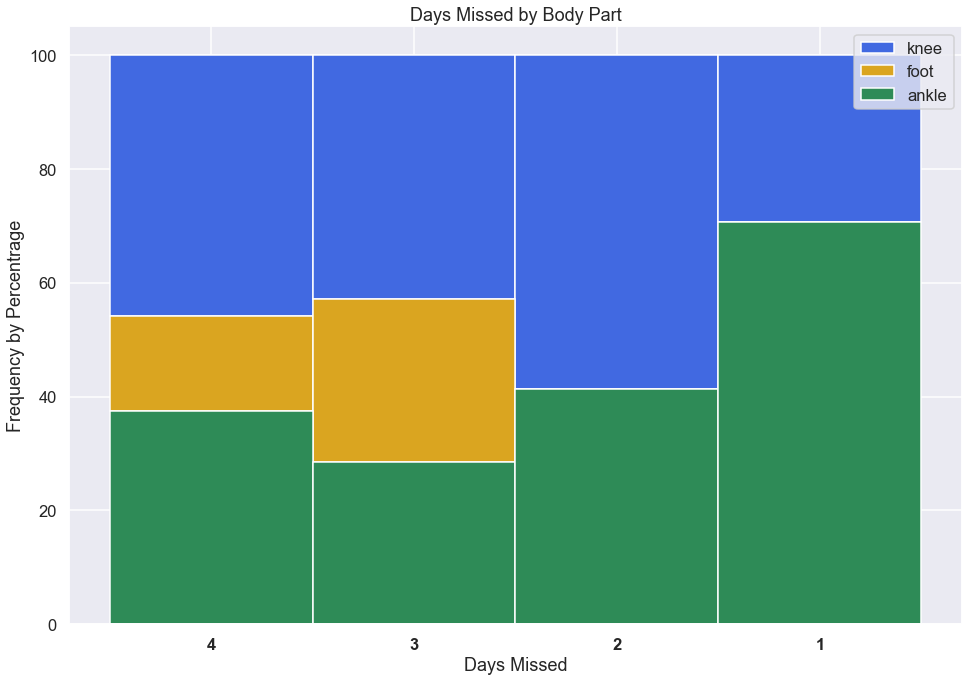

In [56]:
#Let's try another stacked bar chart 
# stacked bar plot
# use our for loop
Knee = []
Foot = []
Ankle = []

for num in df.days_missed.unique():
    for part in df.BodyPart.unique():
        if part == 'Knee':
            Knee.append(len(df.loc[(df.BodyPart == part)&(df.days_missed==num)]))
        elif part == 'Foot':
            Foot.append(len(df.loc[(df.BodyPart == part)&(df.days_missed==num)]))
        else:
            Ankle.append(len(df.loc[(df.BodyPart == part)&(df.days_missed==num)]))


Days_Missed = [4,3,2,1]


#Get values from the group and categories
DaysMissed = np.array(Days_Missed)
Knee = np.array(Knee)
Foot = np.array(Foot)
Ankle = np.array(Ankle)
total = Knee+ Foot+ Ankle
proportion_knee = np.true_divide(Knee, total) * 100
proportion_foot = np.true_divide(Foot, total) * 100
proportion_ankle = np.true_divide(Ankle, total) * 100
    
# The position of the bars on the x-axis
r = range(len(DaysMissed))
barWidth = 1
#plot bars
plt.figure(figsize=(16,11))
ax1 = plt.bar(r, proportion_knee, bottom=proportion_foot+proportion_ankle, color='royalblue', edgecolor='white', width=barWidth, label="knee")
ax2 = plt.bar(r, proportion_foot, bottom=proportion_ankle, color='goldenrod', edgecolor='white', width=barWidth, label='foot')
ax3 = plt.bar(r, proportion_ankle, color='seagreen', edgecolor='white', width=barWidth, label='ankle')
plt.legend()
plt.xticks(r, Days_Missed, fontweight='bold')
plt.ylabel("Frequency by Percentrage")
plt.xlabel("Days Missed")
plt.title("Days Missed by Body Part")
plt.show()

Looks like if you have a foot injury you can expect to be out for quite a while.

###### Does field type affect time missed?

Text(0.5, 1.0, 'Injuries by Field Type and days_missed')

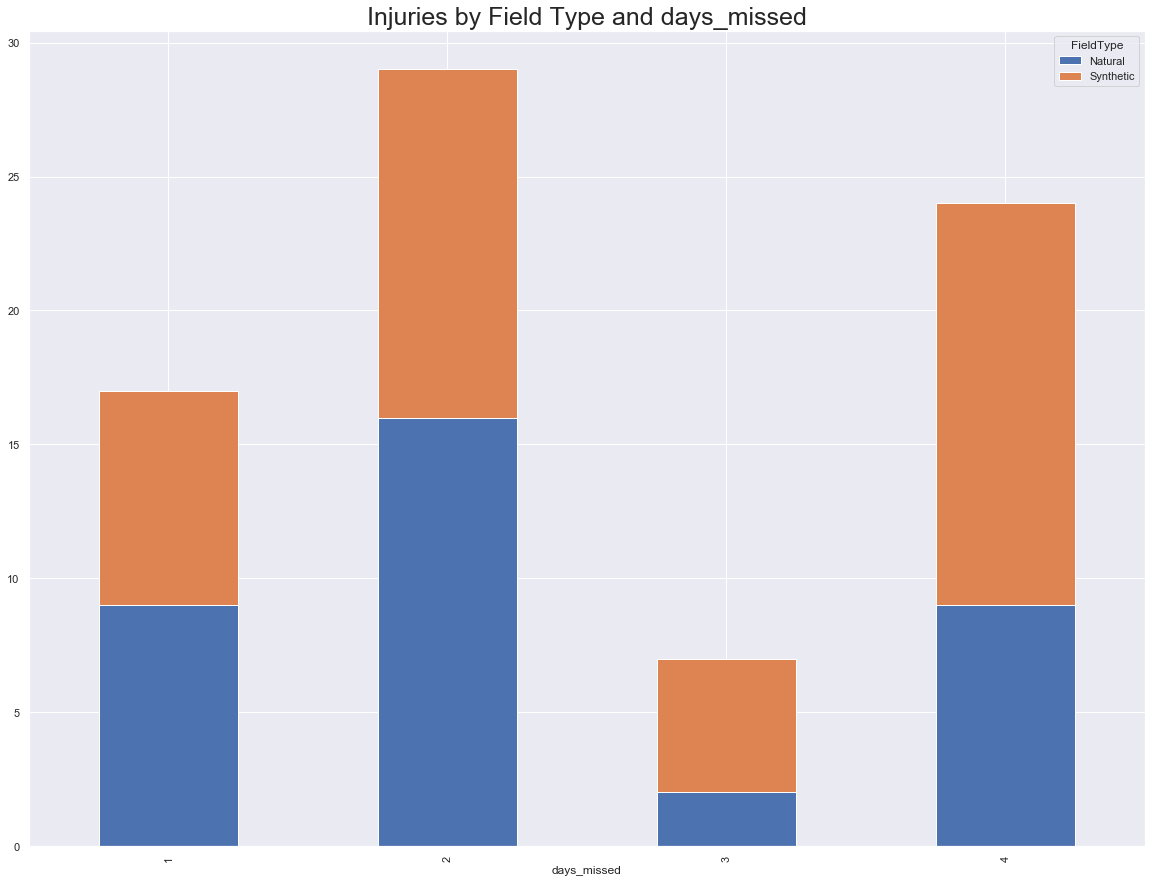

In [50]:
df_plot3 = df.groupby(['FieldType','days_missed']).size().reset_index().pivot(
    columns='FieldType', index='days_missed', values= 0)
df_plot3.plot(kind='bar', stacked=True, figsize=(20,15))
plt.title('Injuries by Field Type and days_missed', fontsize=25)

###### Does the play type affect time missed?

Text(0.5, 1.0, 'Injuries by Play Type and days_missed')

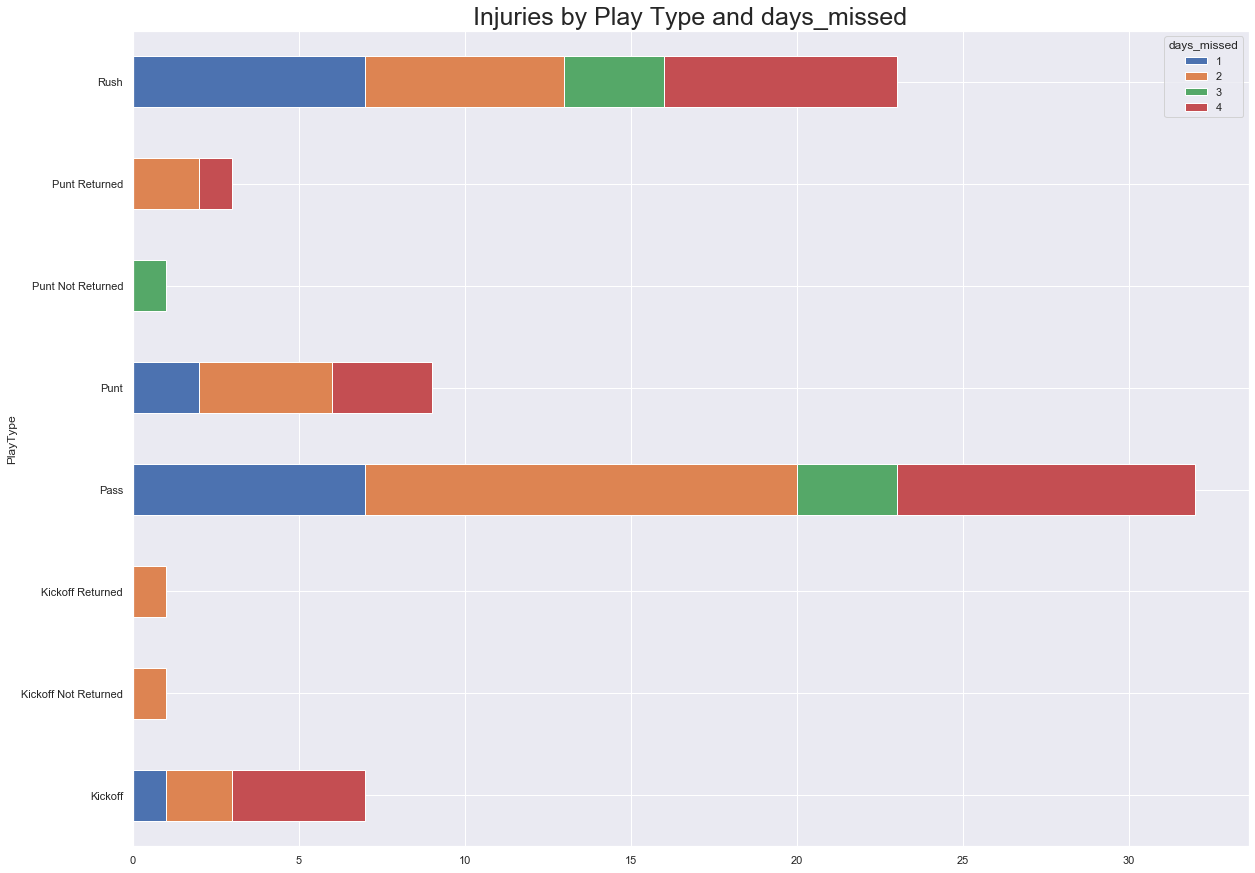

In [51]:
df_plot3 = df.groupby(['days_missed', 'PlayType']).size().reset_index().pivot(
    columns='days_missed', index='PlayType', values=0)
df_plot3.plot(kind='barh', stacked=True, figsize=(20,15))
plt.title('Injuries by Play Type and days_missed', fontsize=25)

Kickoffs and punts make up a disproportionate amount of the fourth category - this confirms the leagues consideration of removing these play types altogether. 

###### Is one position group more likely to miss more time than others?

Text(0.5, 1.0, 'Injuries by Position Group and days_missed')

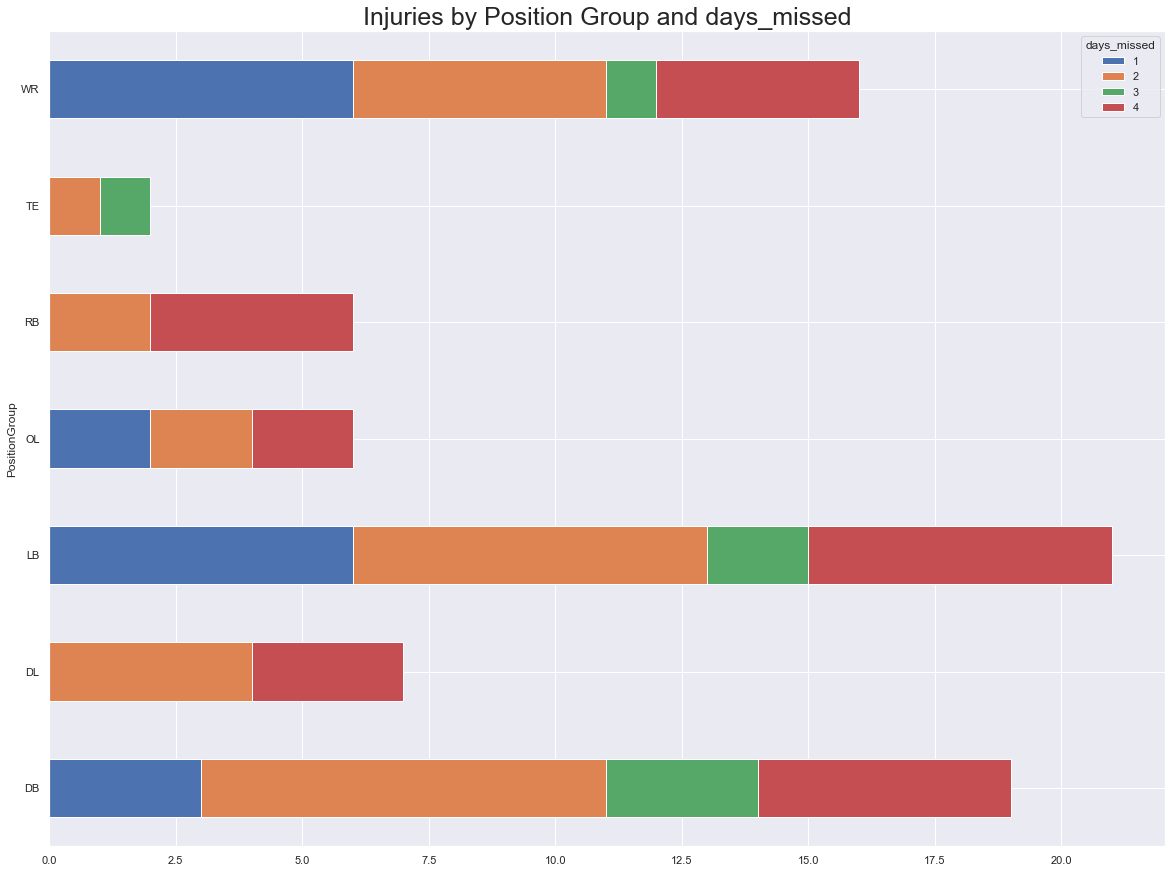

In [52]:
df_plot3 = df.groupby(['days_missed', 'PositionGroup']).size().reset_index().pivot(
    columns='days_missed', index='PositionGroup', values=0)
df_plot3.plot(kind='barh', stacked=True, figsize=(20,15))
plt.title('Injuries by Position Group and days_missed', fontsize=25)

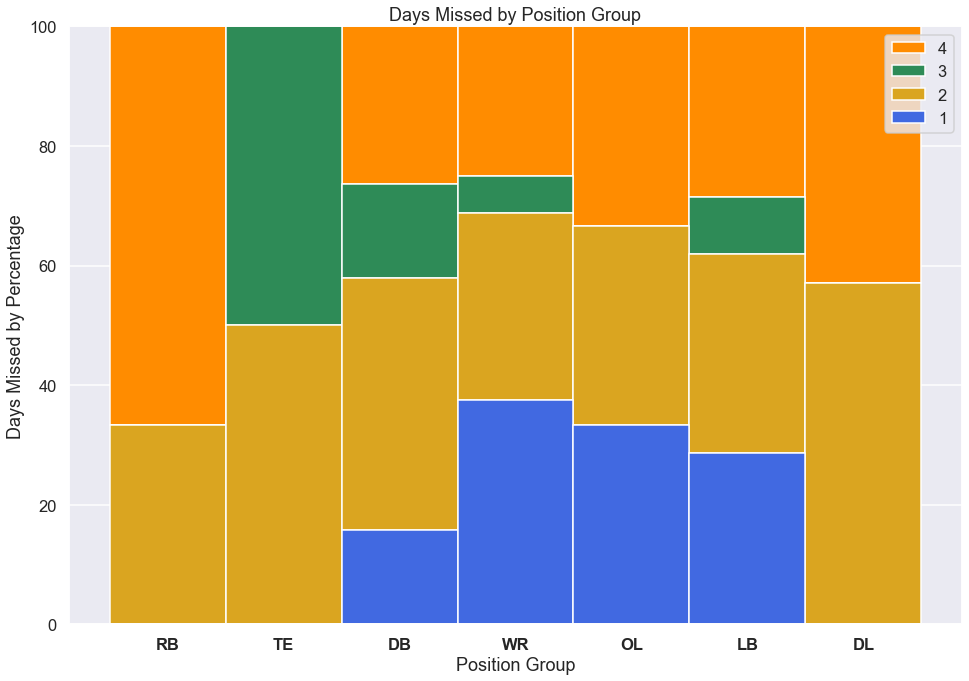

In [63]:
One = []
Two = []
Three = []
Four = []

for pos in df.PositionGroup.unique():
    for num in df.days_missed.unique():
        if num == 1:
            One.append(len(df.loc[(df.days_missed == num)&(df.PositionGroup==pos)]))
        elif num == 2:
            Two.append(len(df.loc[(df.days_missed == num)&(df.PositionGroup==pos)]))
        elif num == 3:
            Three.append(len(df.loc[(df.days_missed == num)&(df.PositionGroup==pos)]))
        else:
            Four.append(len(df.loc[(df.days_missed == num)&(df.PositionGroup==pos)]))


Position_Groups = []
for pos in df.PositionGroup.unique():
    Position_Groups.append(pos)

#Get values from the group and categories
PositionGroups = np.array(Position_Groups)
One_ = np.array(One)
Two_ = np.array(Two)
Three_ = np.array(Three)
Four_ = np.array(Four)
total = One_+ Two_+ Three_ + Four_
proportion_one = np.true_divide(One, total) * 100
proportion_two = np.true_divide(Two, total) * 100
proportion_three = np.true_divide(Three, total) * 100
proportion_four = np.true_divide(Four, total) * 100
    
# The position of the bars on the x-axis
r = range(len(Position_Groups))
barWidth = 1
#plot bars
plt.figure(figsize=(16,11))
ax1 = plt.bar(r, proportion_four, bottom=proportion_one+proportion_two+proportion_three, color='darkorange', edgecolor='white', width=barWidth, label="4")
ax2 = plt.bar(r, proportion_three, bottom=proportion_one+proportion_two, color='seagreen', edgecolor='white', width=barWidth, label='3')
ax3 = plt.bar(r, proportion_two, bottom=proportion_one, color='goldenrod', edgecolor='white', width=barWidth, label='2')
ax4 = plt.bar(r, proportion_one, color='royalblue', edgecolor='white', width=barWidth, label='1')
plt.legend()
plt.xticks(r, Position_Groups, fontweight='bold')
plt.ylabel("Days Missed by Percentage")
plt.xlabel("Position Group")
plt.title("Days Missed by Position Group")
plt.show()

It looks like tight ends, running backs, and defensive linemen aren't often out for less than 7 days. Keep this in mind if they sustain a lower extremity injury.

<Figure size 1440x1080 with 0 Axes>

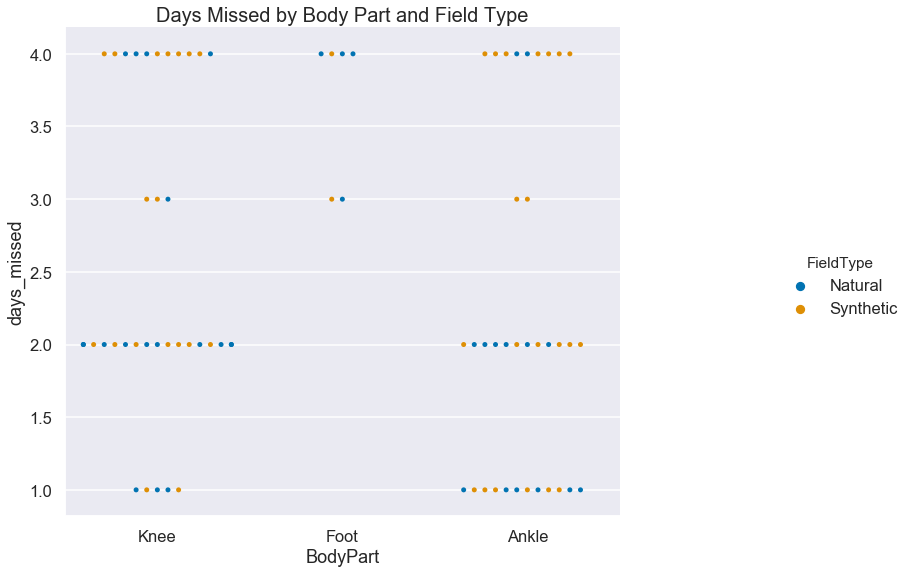

In [99]:
plt.figure(figsize=(20,15))
sns.set_context('talk')

g = sns.catplot(x='BodyPart', y="days_missed", hue="FieldType", kind="swarm", data=df, palette=colors)
g.fig.set_figwidth(15)
g.fig.set_figheight(9)
plt.title('Days Missed by Body Part and Field Type', fontsize=20)
plt.show();

### Exploration Conclusions

After exploring the data we've made some interesting observations (remember, we don't know anything for fact quite yet). They are: 

1. Knee and Ankle injuries occur at similar rates
2. Injuries occur at similar rates on grass and turf. 
3. Wide Reciever, Defensive Back, and Linebacker are most frequently injured, mostly ankle/knee.
4. Knee/Ankle injuries most commonly miss <3 weeks, while foot injuries are always >2 months
5. Grass and Turf don't appear to have a significant effect on time missed.
6. Time missed is quite variable throughout position groups, but an interesting note that
tight ends, runningbacks, and defensive lineman are never out for less than 1 week.

In [46]:
df.to_csv('./data/NFL.csv', index=False)